In [1]:
# from https://sisl.github.io/AutomotiveSimulator.jl/dev/tutorials/intersection/
using AutomotiveSimulator
using AutomotiveVisualization
using Random
using LinearAlgebra

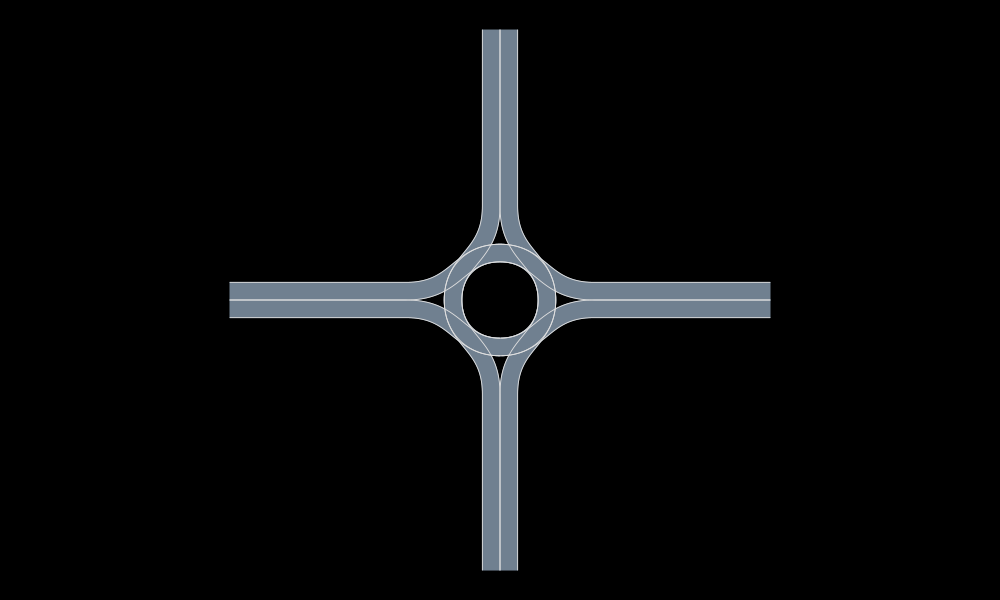

In [2]:
include("lane_specific_driver.jl")
include("make_roundabout.jl")
roadway = make_roundabout()
snapshot = render([roadway])

In [3]:
#using Reel

timestep = 0.1
nticks = 300
L=30
vs0 = VehicleState(VecSE2(-L, r-DEFAULT_LANE_WIDTH/2, 0.0), roadway, 8.0)
vs1 = VehicleState(VecSE2(L, r+DEFAULT_LANE_WIDTH/2, π), roadway, 9.0) # desired speed 9.0
snail = VehicleState(VecSE2(DEFAULT_LANE_WIDTH/2, -L, 0.5π), roadway, 5.0)


scene = Scene([Entity(vs0, VehicleDef(), 1),
               Entity(vs1, VehicleDef(), 2),
               Entity(snail, VehicleDef(), 3)
            ])

car_colors = Dict(:UNSAFE => RGB(0.95, 0.1, 0.1),
              :SAFE   => RGB(0.1, 0.95, 0.1),
              :RL     => RGB(0.6, 0.1, 0.6),)

colors = Dict( 1 => car_colors[:UNSAFE],
2 => car_colors[:UNSAFE],
3 => car_colors[:UNSAFE])

models = Dict(1 => InterDriver(LaneSpecificAccelLatLon(0.0,0.0), 0, 10, 10, :ZERO, :SAFE, 1.0),
              2 => InterDriver(LaneSpecificAccelLatLon(0.0,0.0), 0, 10, 10, :ZERO, :UNSAFE, 0.5),
              3 => InterDriver(LaneSpecificAccelLatLon(0.0,0.0), 0, 10, 10, :ZERO, :SAFE, 0.5),
             )


scenes = simulate(scene, roadway, models, nticks, timestep)
#snapshot = render(renderables)

301-element Vector{EntityScene{VehicleState, VehicleDef, Int64}}:
 Scene{Entity{VehicleState, VehicleDef, Int64}}(3 entities)
 Scene{Entity{VehicleState, VehicleDef, Int64}}(3 entities)
 Scene{Entity{VehicleState, VehicleDef, Int64}}(3 entities)
 Scene{Entity{VehicleState, VehicleDef, Int64}}(3 entities)
 Scene{Entity{VehicleState, VehicleDef, Int64}}(3 entities)
 Scene{Entity{VehicleState, VehicleDef, Int64}}(3 entities)
 Scene{Entity{VehicleState, VehicleDef, Int64}}(3 entities)
 Scene{Entity{VehicleState, VehicleDef, Int64}}(3 entities)
 Scene{Entity{VehicleState, VehicleDef, Int64}}(3 entities)
 Scene{Entity{VehicleState, VehicleDef, Int64}}(3 entities)
 Scene{Entity{VehicleState, VehicleDef, Int64}}(3 entities)
 Scene{Entity{VehicleState, VehicleDef, Int64}}(3 entities)
 Scene{Entity{VehicleState, VehicleDef, Int64}}(3 entities)
 ⋮
 Scene{Entity{VehicleState, VehicleDef, Int64}}(3 entities)
 Scene{Entity{VehicleState, VehicleDef, Int64}}(3 entities)
 Scene{Entity{VehicleState, Veh

In [4]:
using Interact
using Reel
using Blink
#md
w = Window()
viz = @manipulate for step in 1 : length(scenes)
    render([roadway, scenes[step]])
end
body!(w, viz)

WebIO._IJuliaInit()

Page(1, WebSocket(server, CONNECTED), Dict{String, Any}("webio" => Blink.AtomShell.var"#22#23"{Blink.AtomShell.WebIOBlinkComm}(Blink.AtomShell.WebIOBlinkComm(Window(1, Electron(Process(`/home/esoroka/.julia/packages/Blink/mwJC9/deps/atom/electron /home/esoroka/.julia/packages/Blink/mwJC9/src/AtomShell/main.js port 3587`, ProcessRunning), Sockets.TCPSocket(RawFD(50) active, 0 bytes waiting), Dict{String, Any}("callback" => Blink.var"#1#2"())), Page(#= circular reference @-5 =#), Task (done) @0x00007efc77596230))), "callback" => Blink.var"#1#2"()), Distributed.Future(1, 1, 1, Some(true)))

In [5]:
#=
#md
w = Window()
viz = @manipulate for i = 1 : length(scenes)
    renderables = [
    roadway,
    (FancyCar(car=veh, color=colors[veh.id]) for veh in scenes[i])...
    ]
    render(renderables)
end
body!(w, viz)
=#